# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [9]:
# Run this cell without changes
df
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

''

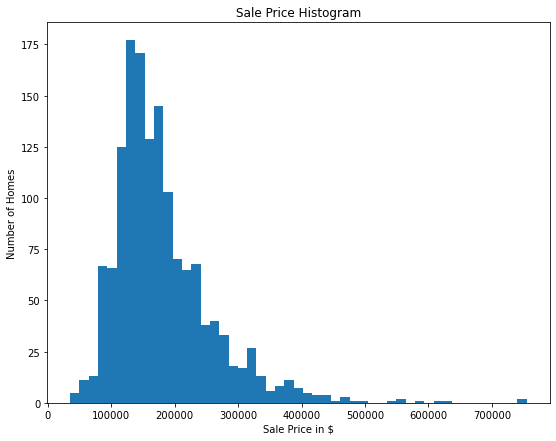

In [26]:
# Your code here
x = df['SalePrice']
fig, ax = plt.subplots(figsize=(9,7))

ax.hist(x, bins='auto')

ax.set_title('Sale Price Histogram')
ax.set_xlabel('Sale Price in $')
ax.set_ylabel('Number of Homes')

;

Now, print out the mean, median, and standard deviation:

In [19]:
# Your code here
df['SalePrice'].describe()

#Mean=180921.2
#StDev=79442.5
#Median=163000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In the cell below, interpret the above information.

In [27]:
# Replace None with appropriate text
"""
The graph and data above, show that the majority of homes in this area sold
between 130k and 214k with the average home costing around 163k (median) or 180k(mean).
The median of 163k is helpful here because there are several outliers with prices 
beyond 400k. 

From the histogram it is also evident that there is a positive skew where most the 
data falls in a certain area followed by a few outliers with very high home prices.

"""

'\nThe graph and data above, show that the majority of homes in this area sold\nbetween 130k and 214k with the average home costing around 163k (median) or 180k(mean).\nThe median of 163k is helpful here because there are several outliers with prices \nbeyond 400k. \n\nFrom the histogram it is also evident that there is a positive skew where most the \ndata falls in a certain area followed by a few outliers with very high home prices.\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

In [29]:
# inspired by the solution code which created a function for creating histograms.
def make_histogram(data, series, title, x_label, y_label):
    x = df[series]
    fig, ax = plt.subplots(figsize=(9,7))

    ax.hist(x, bins='auto')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

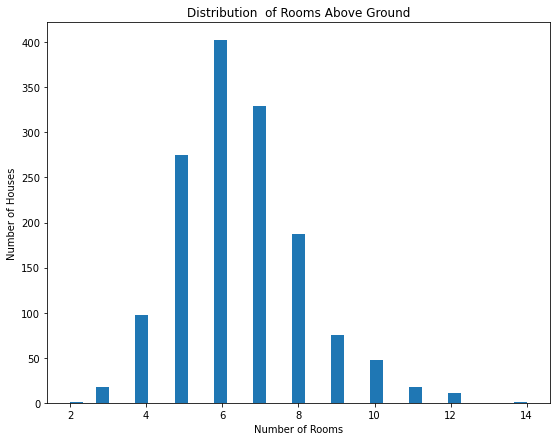

In [31]:
make_histogram(df, 'TotRmsAbvGrd', 'Distribution  of Rooms Above Ground', 'Number of Rooms',
              'Number of Houses')

Now, print out the mean, median, and standard deviation:

In [32]:
# Your code here
df['TotRmsAbvGrd'].describe()
#mean: 6.517808
#StdDev: 1.625
#median: 6.00

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In the cell below, interpret the above information.

In [33]:
# Replace None with appropriate text
"""
The data is relatively evenly distribited with only a slight positive skew. 
The mean and median differ by 1/2 of a room, making the average around
6 rooms above grade per house. 

The majority of the homes in the dataset have between 5 and 7
rooms above grade. 

There are relatively few outliers - one home with only 2 rooms and another home
with a whopping 14 rooms. 
"""

'\nThe data is relatively evenly distribited with only a slight positive skew. \nThe mean and median differ by 1/2 of a room and fall around 6-7 rooms above\ngrade per house. \n\nThe majority of the homes in the dataset have between 5 and 7\nrooms above grade. \n\nThere are relatively few outliers - one home with only 2 rooms and another home\nwith a whopping 14 rooms. \n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [36]:
df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

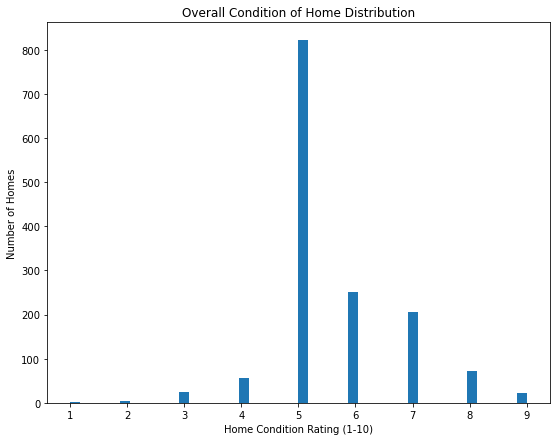

In [37]:
# Your code here
make_histogram(df, 'OverallCond', 'Overall Condition of Home Distribution',
              'Home Condition Rating (1-10)', 'Number of Homes')

Now, print out the mean, median, and standard deviation:

In [40]:
# Your code here
df['OverallCond'].describe()
#mean=5.58
#StdDev=1.11
#median=5.00

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In the cell below, interpret the above information.

In [41]:
# Replace None with appropriate text
"""
The most common rating (e.g., mode and median) is around 5.00 with the average 
being 5.56. 

The higher average is due to the negative skew of the data, meaning there are
more values above a 5 rating than below a 5 rating. 

When looking at the column of data, all of the values are rounded integers, not
floats, making the data less specific since it can only fall between 10 ratings.
"""

'\nThe most common rating (e.g., mode and median) is around 5.00 with the average \nbeing 5.56. \n\nThe higher average is due to the negative skew of the data, meaning there are\nmore values above a 5 rating than below a 5 rating. \n\nWhen looking at the column it self, alll fo the values are rounded integers, not\nfloats, making the data less specific since it can only fall between 10 ratings.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [42]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [43]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

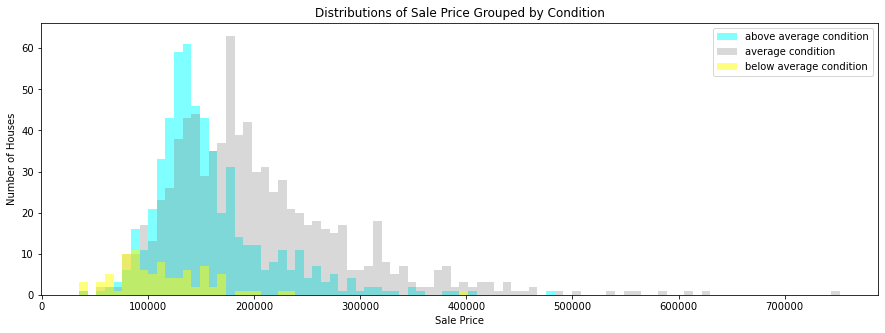

In [44]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
Most of the houses in the distribution fall under average condition, making it a 
more complete distribution with less skew.  

Very few homes fall in the below average condition and these homes sell form much
less than homes in the other caregories.

What is surprising though is that the above average homes don't sell for 
more than average condition homes. In fact, these homes seem to sell for less.
I'm not sure why this is, but definitely worth further analysis and exploration.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [62]:
# Your code here
correlation_values = df.corrwith(df['SalePrice'], method='pearson')
correlation_values.sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [55]:
print('The column/variable most strongly correlated with Sale Price is Overall Quality.\
 The correlation value is .791.')

The column/variable most strongly correlated with Sale Price is Overall Quality. The correlation value is .791.


Now, find the ***most negatively correlated*** column:

In [58]:
# Your code here
print('The column/variable most negatively correlated with Sale Price is \
Kitchen Above Grade with a correlation value of -.136')


The column/variable most negatively correlated with Sale Price is Kitchen Above Grade with a correlation value of -.136


Once you have your answer, edit the code below so that it produces a scatter plot of the relevant columns.

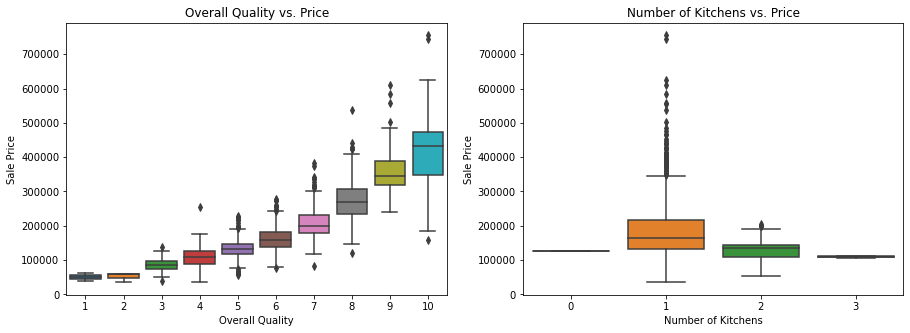

In [64]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Overall Quality vs. Price')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Number of Kitchens vs. Price')
ax2.set_xlabel('Number of Kitchens')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [65]:
# Replace None with appropriate text
"""
The correlation between quality and price is very strong and this is evidenced
by the visualization. The data follows a clear pattern - as quality increases
so does price. Utilizing the boxplots, there also seem to be more outliers in
price as the quality of the home goes up.

The graph on the right - number of kitchens vs. price is unhelpful and unclear.
All that can really be assessed is that most homes have 1-2 kitchen. What is 
interesting though is that with higher numbers of kitchens the price of the home doesn't
increase dramatically, instead it decreases. 
"""

"\nThe correlation between quality and price is very strong and this is evidenced\nby the visualization. The data follows a clear pattern - as quality increases\nso does price. Utilizing the boxplots, there also seem to be more outliers in\nprice as the quality of the home goes up.\n\nThe graph on the right - number of kitchens vs. price is unhelpful and unclear.\nAll that can really be assessed is that most homes have 1-2 kitchen. What is \ninteresting though is that with higher numbers of kitchens the price of the home doesn't\nincrease dramatically, instead it decreases. \n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [68]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

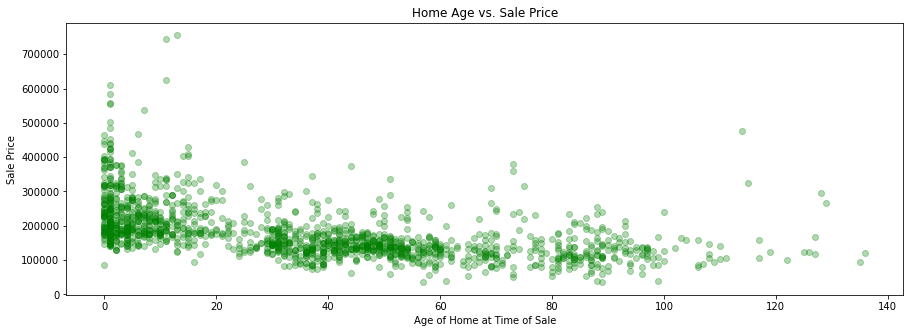

In [69]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
New homes and homes within 2-5 years tend to sell more frequently and at a higher
price. But after around 20 years, the average sale price seems to stabilize with
homes between 40-80 years selling loosely in the same price threshold. Homes 60 
years and older also seem to sell less frequently than younger homes. 

"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.